# Data

Firstly, let's have a look closely to the data we have.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('shots.csv')

In [3]:
data.head(5)

,event,is_goal,period,time,distance,angle,is_rebound,is_pass_before,is_cross_line,is_one_touch,is_fast_attack
0,Shot Attempt - Wide left,False,1,1071.6,17.4,44.492971,False,False,False,False,False
1,Shot Attempt - Blocked,False,1,519.2,12.9,46.694647,False,False,False,False,False
2,Shot Attempt - Deflected,False,2,742.9,20.6,59.284706,False,False,False,False,False
3,Shot Attempt - Blocked,False,1,210.1,16.6,5.419532,False,True,False,True,False
4,Shot Attempt - Deflected,False,2,599.1,20.1,64.221569,False,False,False,False,False


How many goal and no goal shots in the data?

In [4]:
data.is_goal.value_counts()

False    13687
True       723
Name: is_goal, dtype: int64

Our data has significantly more no goal shots.

Split the data into goal and no goal for further analysis.

In [5]:
goal = data[data.is_goal == True]
no_goal = data[data.is_goal == False]

How many different kinds of goal shots there?

In [6]:
goal.event.value_counts()

Shot Attempt - Upper right      164
Shot Attempt - Upper left       162
Shot Attempt - Bottom middle    105
Shot Attempt - Lower right       90
Shot Attempt - Lower left        73
Shot Attempt - Deflected         63
Shot Attempt - Top middle        50
Shot Attempt - Blocked           10
Shot Attempt - Wide left          3
Shot Attempt - Wide right         2
Shot Attempt - Over the net       1
Name: event, dtype: int64

Interesting, that there are few missed the net shots resulting in goals. For example, let's check the one over the net shot.

In [7]:
goal[goal.event == 'Shot Attempt - Over the net']

,event,is_goal,period,time,distance,angle,is_rebound,is_pass_before,is_cross_line,is_one_touch,is_fast_attack
2702,Shot Attempt - Over the net,True,2,453.7,3.8,47.29061,True,False,False,True,False


It was the rebound shot.

How many different kinds of no goal shots in the data?

In [8]:
no_goal.event.value_counts()

Shot Attempt - Blocked          3832
Shot Attempt - Upper right      1326
Shot Attempt - Lower left       1201
Shot Attempt - Upper left       1181
Shot Attempt - Deflected        1088
Shot Attempt - Lower right      1047
Shot Attempt - Wide right        949
Shot Attempt - Wide left         941
Shot Attempt - Bottom middle     881
Shot Attempt - Top middle        844
Shot Attempt - Over the net      397
Name: event, dtype: int64

Let's have a look on the shots distributions depending on periods.

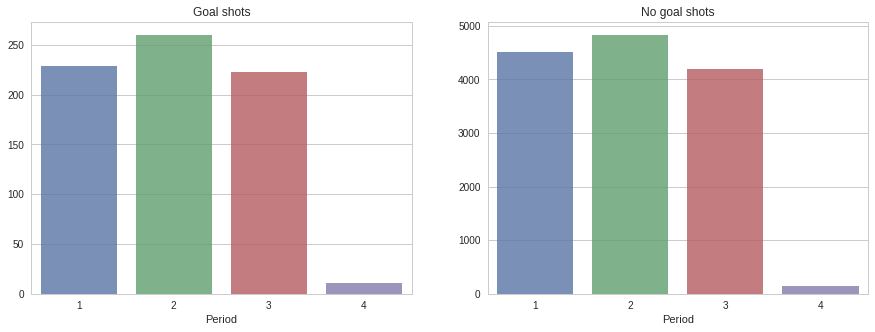

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(goal.period.value_counts().keys(), goal.period.value_counts(), alpha=0.8)
plt.xlabel('Period')
plt.ylabel('')
plt.title('Goal shots')
plt.subplot(1, 2, 2)
sns.barplot(no_goal.period.value_counts().keys(), no_goal.period.value_counts(), alpha=0.8)
plt.xlabel('Period')
plt.ylabel('')
plt.title('No goal shots')
plt.show()

There were a little more shots in second periods and a small amount of them in the forth periods. The patterns are the same for goal and no goal shots.

What are the distrubutions of shots depending on time?

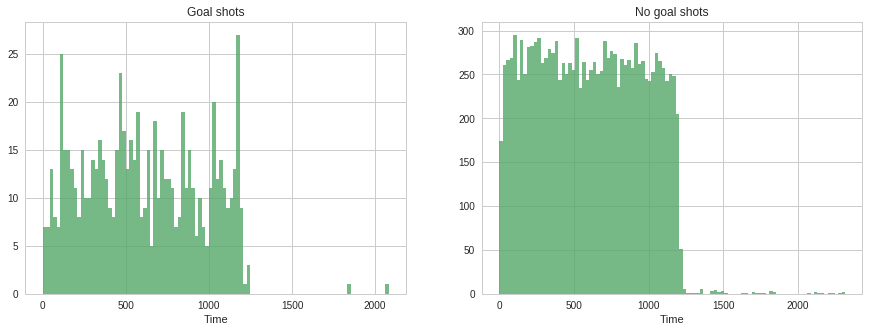

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(goal.time, 100, color=color[1], alpha=0.8)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Goal shots')
plt.subplot(1, 2, 2)
plt.hist(no_goal.time, 100, color=color[1], alpha=0.8)
plt.xlabel('Time')
plt.ylabel('')
plt.title('No goal shots')
plt.show()

Again, there is no specific pattern for the goal or no goal shots.

There should be something interesting with distance and angle parameters.

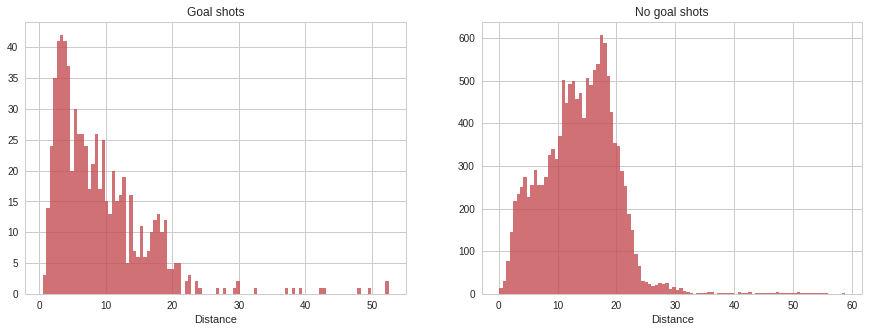

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(goal.distance, 100, color=color[2], alpha=0.8)
plt.xlabel('Distance')
plt.ylabel('')
plt.title('Goal shots')
plt.subplot(1, 2, 2)
plt.hist(no_goal.distance, 100, color=color[2], alpha=0.8)
plt.xlabel('Distance')
plt.ylabel('')
plt.title('No goal shots')
plt.show()

Here we got two really distinct distributions. The goal shots have a peak around the 3 meters distance and the no goal shots have a peak around 17 meters (it is near the blue line). However, there are few long distance goal shots, even further than 50 meters.

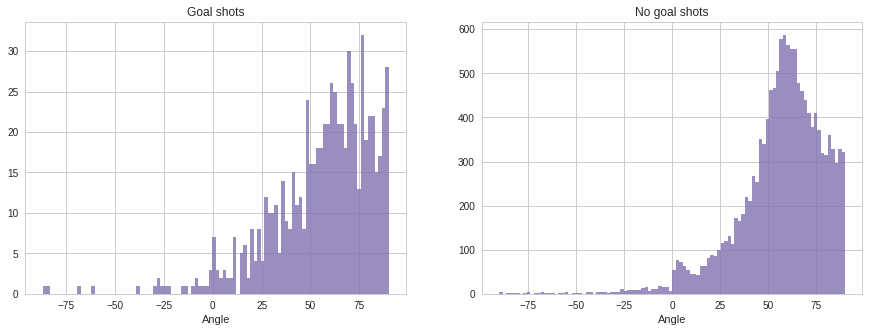

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(goal.angle, 100, color=color[3], alpha=0.8)
plt.xlabel('Angle')
plt.ylabel('')
plt.title('Goal shots')
plt.subplot(1, 2, 2)
plt.hist(no_goal.angle, 100, color=color[3], alpha=0.8)
plt.xlabel('Angle')
plt.ylabel('')
plt.title('No goal shots')
plt.show()

What about angle dependency? Nothing special, except that there is a strong peak for the no goal shots around 55 degrees, while the goal shots are distributed more evenly between 50 and 90 degrres.

Lastly, let's explore the five binary parameters. There are barplots of the number of goal and no goal shots for two different values for every one of the five parameters. Also, there are distance and angle boxplots for every binary parameter.

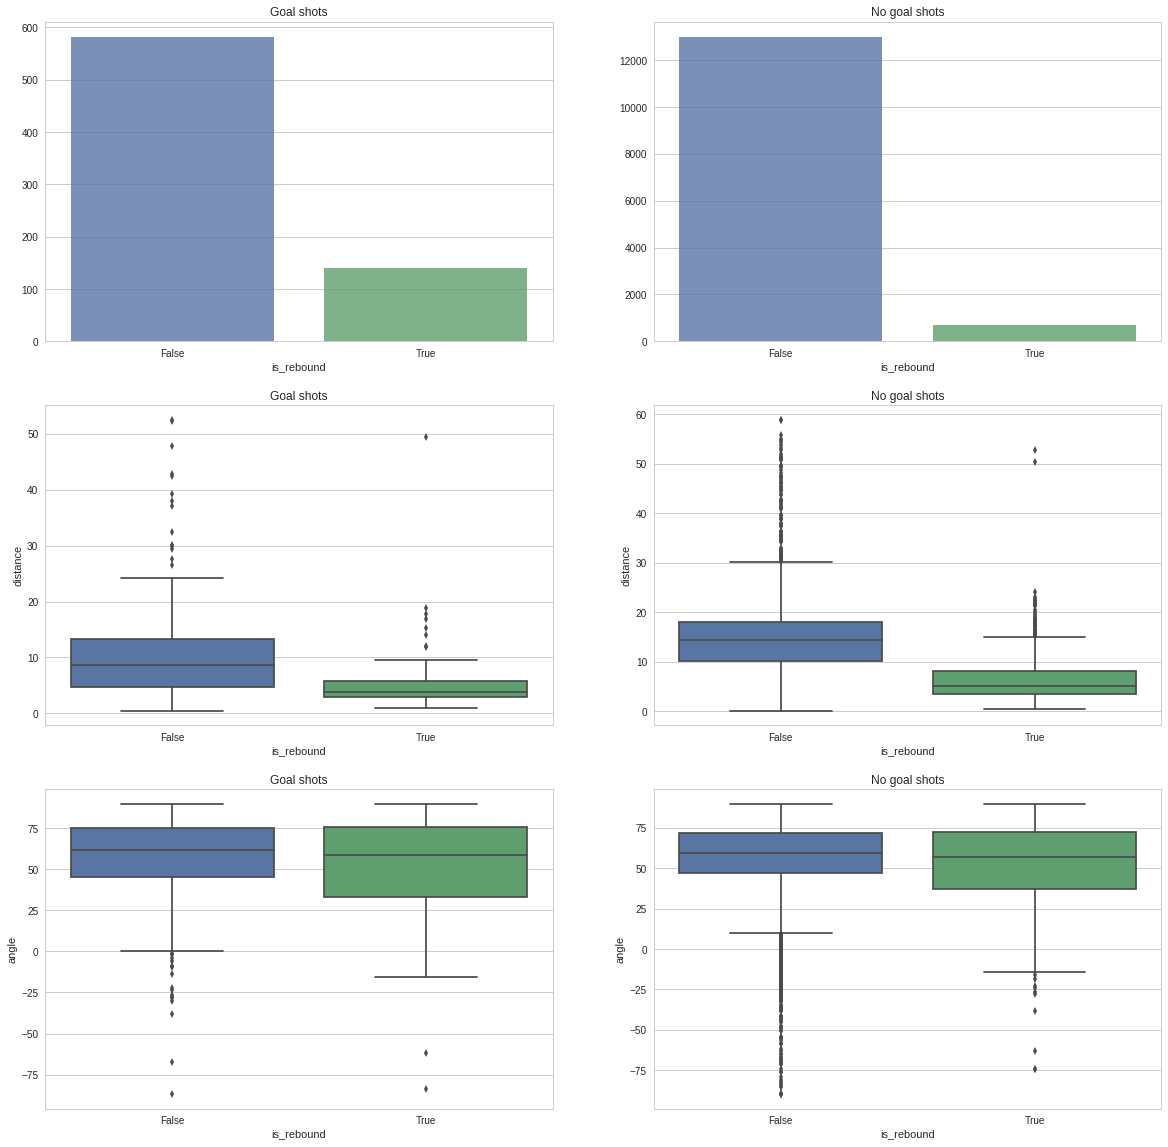

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
sns.barplot(goal.is_rebound.value_counts().keys(), goal.is_rebound.value_counts(), alpha=0.8)
plt.xlabel('is_rebound')
plt.ylabel('')
plt.title('Goal shots')
plt.subplot(3, 2, 2)
sns.barplot(no_goal.is_rebound.value_counts().keys(), no_goal.is_rebound.value_counts(), alpha=0.8)
plt.xlabel('is_rebound')
plt.ylabel('')
plt.title('No goal shots')
plt.subplot(3, 2, 3)
sns.boxplot(x='is_rebound', y='distance', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 4)
sns.boxplot(x='is_rebound', y='distance', data=no_goal)
plt.title('No goal shots')
plt.subplot(3, 2, 5)
sns.boxplot(x='is_rebound', y='angle', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 6)
sns.boxplot(x='is_rebound', y='angle', data=no_goal)
plt.title('No goal shots')
plt.show()

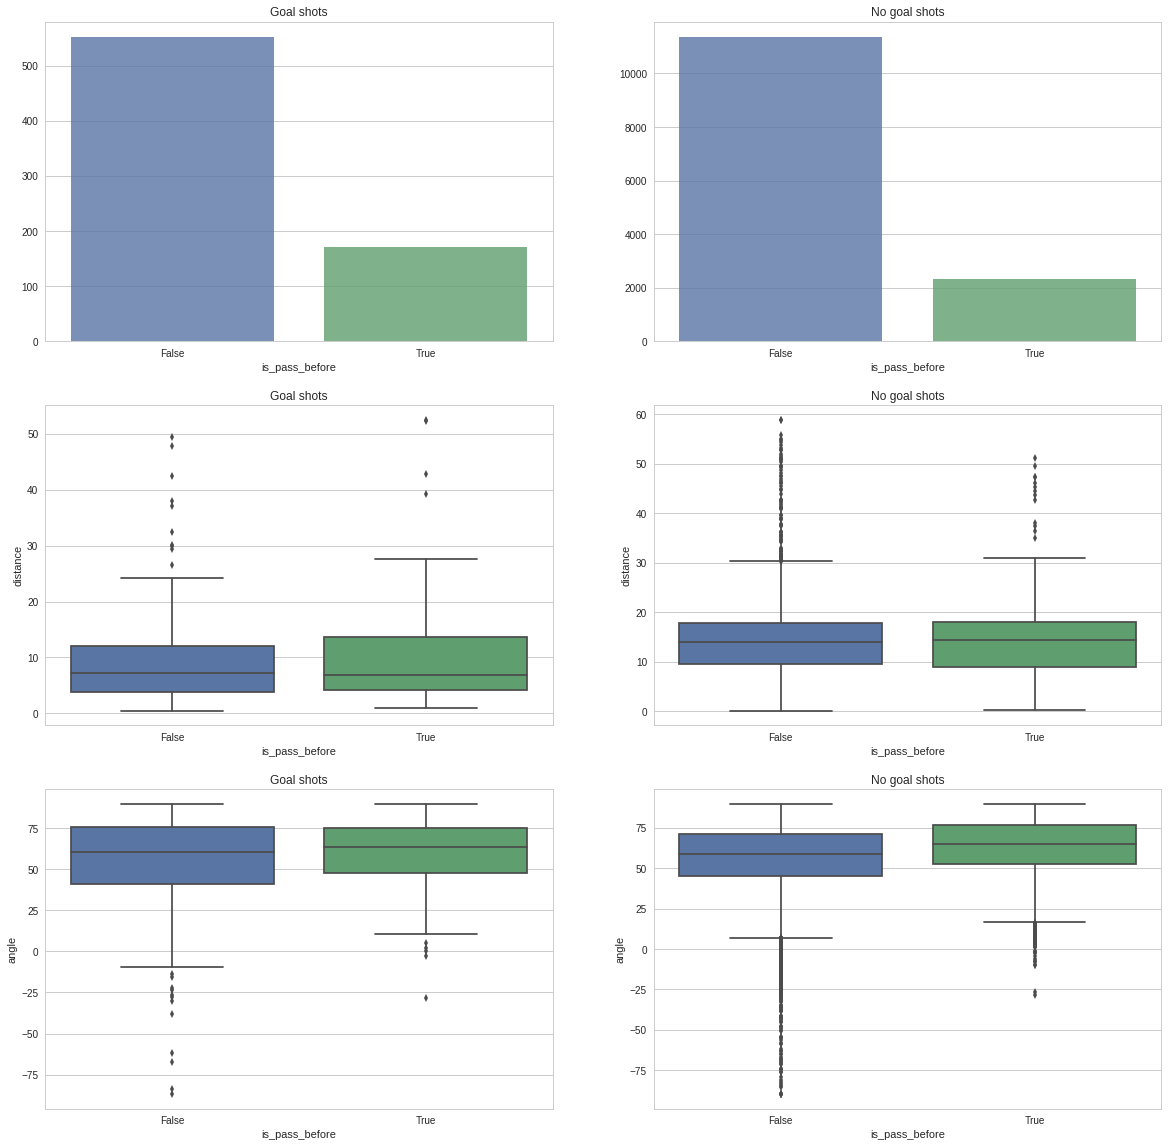

In [16]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
sns.barplot(goal.is_pass_before.value_counts().keys(), goal.is_pass_before.value_counts(), alpha=0.8)
plt.xlabel('is_pass_before')
plt.ylabel('')
plt.title('Goal shots')
plt.subplot(3, 2, 2)
sns.barplot(no_goal.is_pass_before.value_counts().keys(), no_goal.is_pass_before.value_counts(), alpha=0.8)
plt.xlabel('is_pass_before')
plt.ylabel('')
plt.title('No goal shots')
plt.subplot(3, 2, 3)
sns.boxplot(x='is_pass_before', y='distance', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 4)
sns.boxplot(x='is_pass_before', y='distance', data=no_goal)
plt.title('No goal shots')
plt.subplot(3, 2, 5)
sns.boxplot(x='is_pass_before', y='angle', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 6)
sns.boxplot(x='is_pass_before', y='angle', data=no_goal)
plt.title('No goal shots')
plt.show()

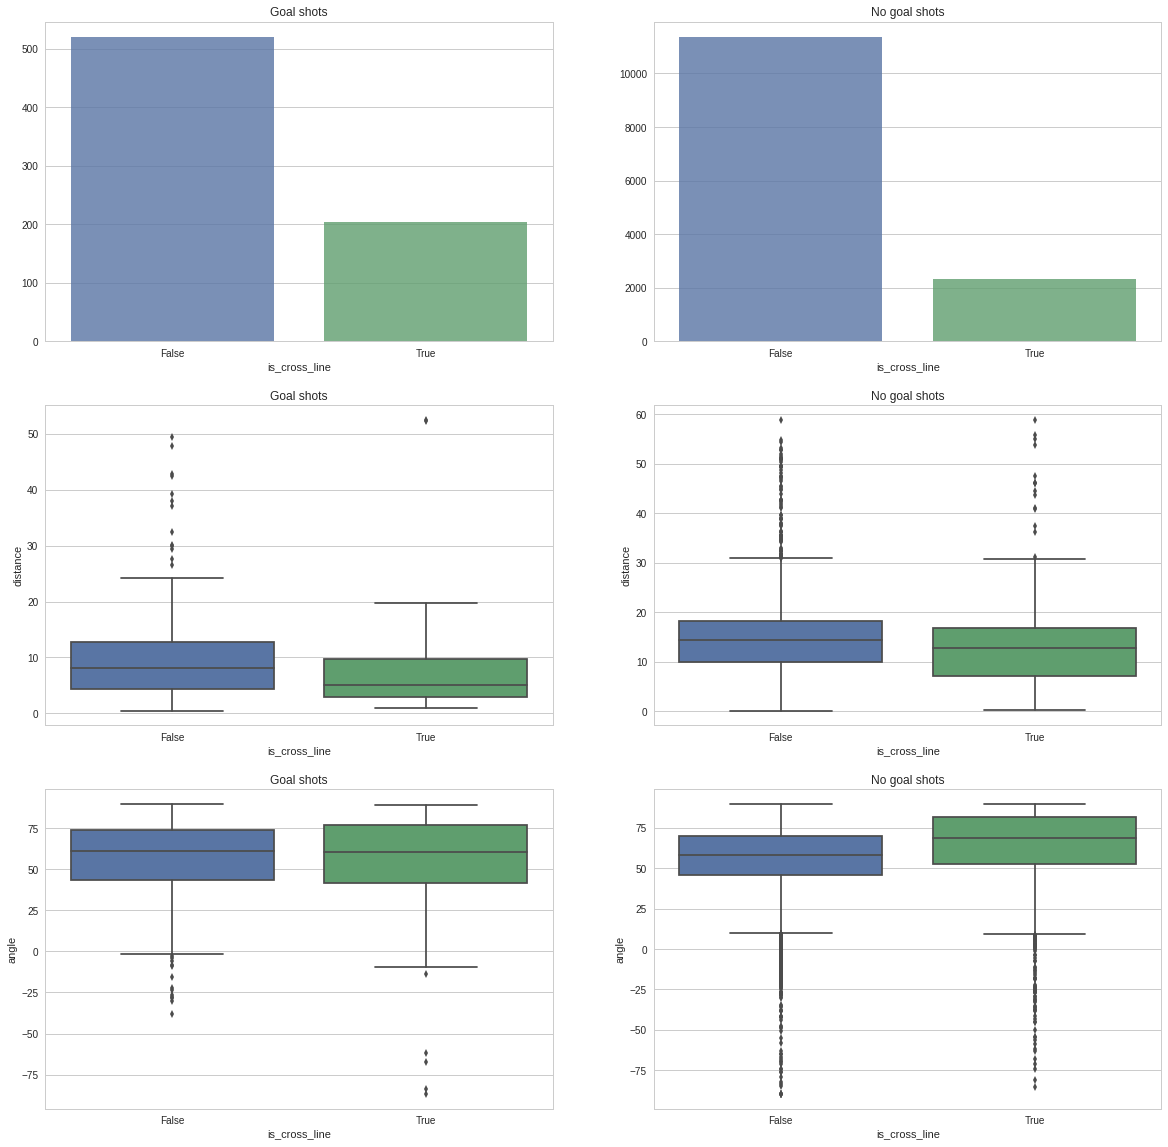

In [17]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
sns.barplot(goal.is_cross_line.value_counts().keys(), goal.is_cross_line.value_counts(), alpha=0.8)
plt.xlabel('is_cross_line')
plt.ylabel('')
plt.title('Goal shots')
plt.subplot(3, 2, 2)
sns.barplot(no_goal.is_cross_line.value_counts().keys(), no_goal.is_cross_line.value_counts(), alpha=0.8)
plt.xlabel('is_cross_line')
plt.ylabel('')
plt.title('No goal shots')
plt.subplot(3, 2, 3)
sns.boxplot(x='is_cross_line', y='distance', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 4)
sns.boxplot(x='is_cross_line', y='distance', data=no_goal)
plt.title('No goal shots')
plt.subplot(3, 2, 5)
sns.boxplot(x='is_cross_line', y='angle', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 6)
sns.boxplot(x='is_cross_line', y='angle', data=no_goal)
plt.title('No goal shots')
plt.show()

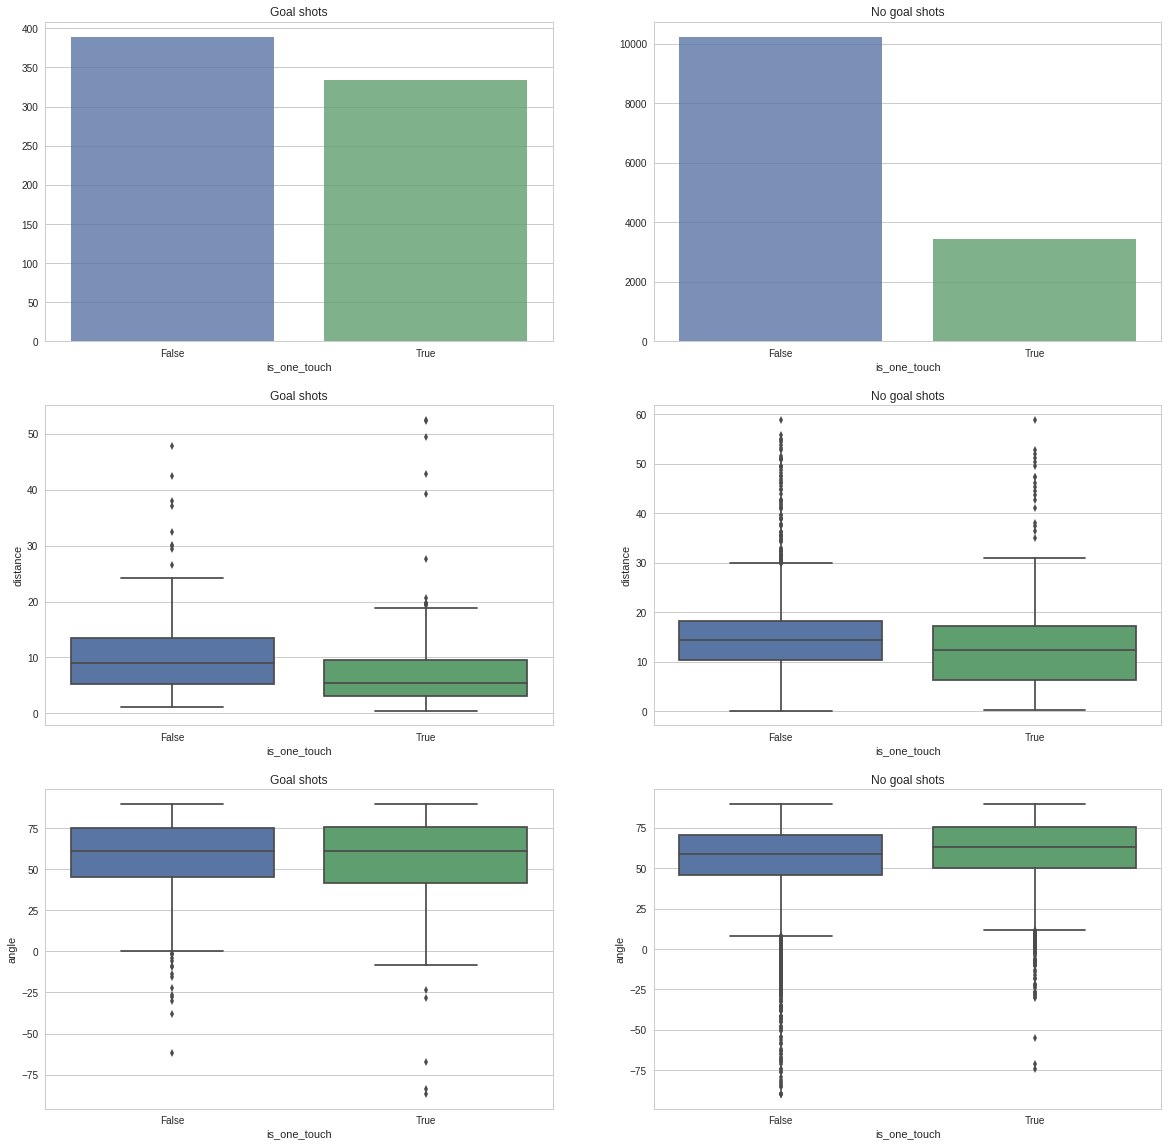

In [18]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
sns.barplot(goal.is_one_touch.value_counts().keys(), goal.is_one_touch.value_counts(), alpha=0.8)
plt.xlabel('is_one_touch')
plt.ylabel('')
plt.title('Goal shots')
plt.subplot(3, 2, 2)
sns.barplot(no_goal.is_one_touch.value_counts().keys(), no_goal.is_one_touch.value_counts(), alpha=0.8)
plt.xlabel('is_one_touch')
plt.ylabel('')
plt.title('No goal shots')
plt.subplot(3, 2, 3)
sns.boxplot(x='is_one_touch', y='distance', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 4)
sns.boxplot(x='is_one_touch', y='distance', data=no_goal)
plt.title('No goal shots')
plt.subplot(3, 2, 5)
sns.boxplot(x='is_one_touch', y='angle', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 6)
sns.boxplot(x='is_one_touch', y='angle', data=no_goal)
plt.title('No goal shots')
plt.show()

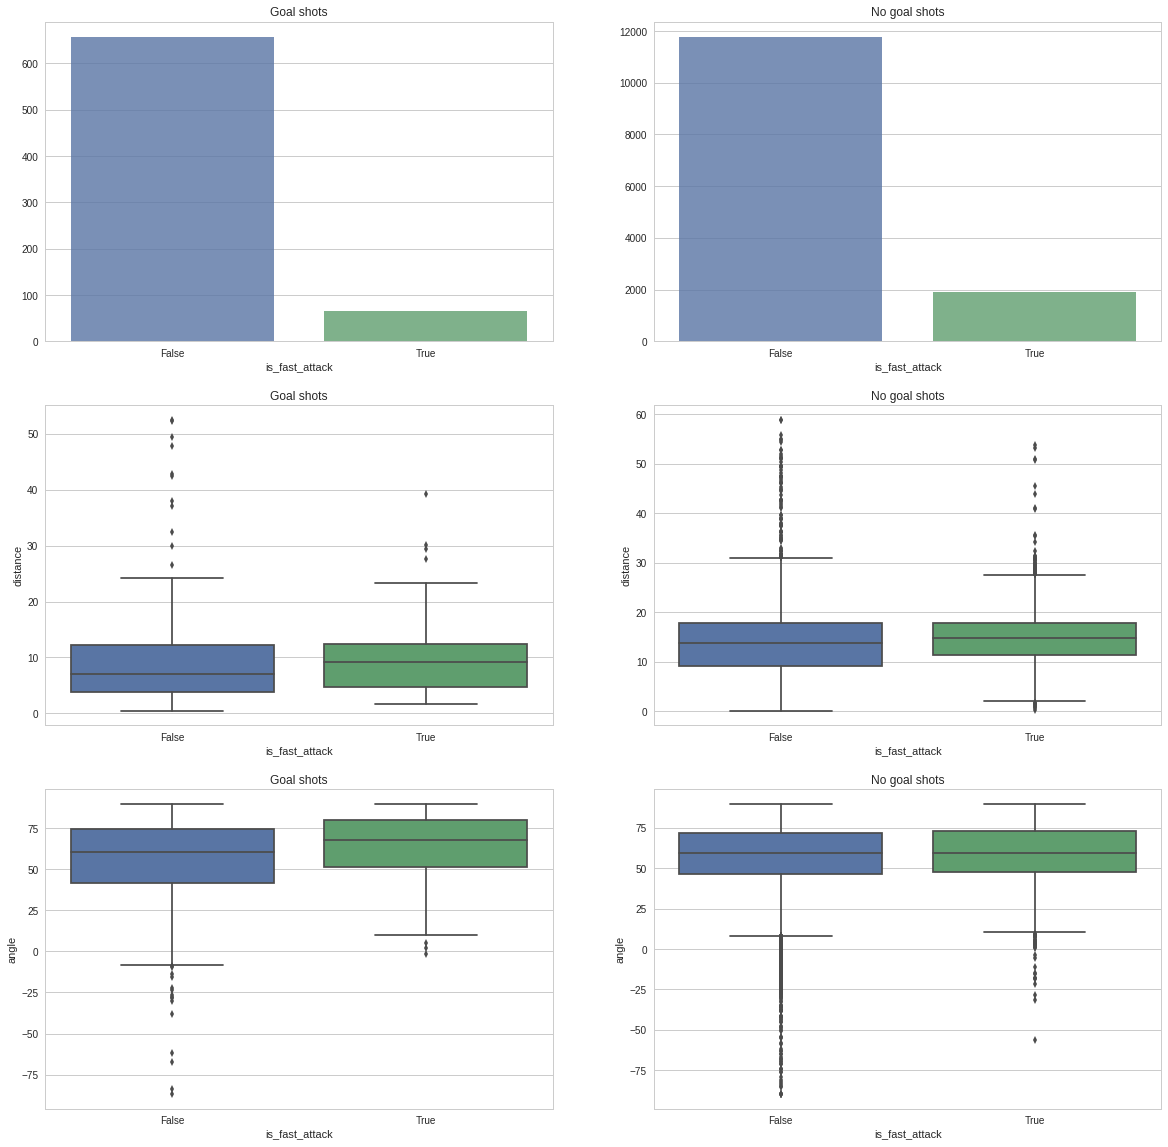

In [19]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
sns.barplot(goal.is_fast_attack.value_counts().keys(), goal.is_fast_attack.value_counts(), alpha=0.8)
plt.xlabel('is_fast_attack')
plt.ylabel('')
plt.title('Goal shots')
plt.subplot(3, 2, 2)
sns.barplot(no_goal.is_fast_attack.value_counts().keys(), no_goal.is_fast_attack.value_counts(), alpha=0.8)
plt.xlabel('is_fast_attack')
plt.ylabel('')
plt.title('No goal shots')
plt.subplot(3, 2, 3)
sns.boxplot(x='is_fast_attack', y='distance', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 4)
sns.boxplot(x='is_fast_attack', y='distance', data=no_goal)
plt.title('No goal shots')
plt.subplot(3, 2, 5)
sns.boxplot(x='is_fast_attack', y='angle', data=goal)
plt.title('Goal shots')
plt.subplot(3, 2, 6)
sns.boxplot(x='is_fast_attack', y='angle', data=no_goal)
plt.title('No goal shots')
plt.show()

Again, nothing special, except the high number of goal shots for the true value of the is_one_touch parameter. The false values are dominating for the rest part.

# xG score

There are different approaches for calculating expected goals score. The common way is to use linear regression models of different shots parameters. An alternative approach though is to consider expected goals as a binary problem (like here http://pena.lt/y/2015/07/13/expected-goals-svm/ author uses SVM). There are machine learning techniques that are able to calculate probabilities rather than just output binary predictions.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve, auc, mean_squared_error, f1_score
from scipy import interp

The two categorical features (event and period) was one-hot encoded as a preprocessing step.

In [4]:
features = pd.get_dummies(data, columns=['event', 'period']).drop('is_goal', axis=1)
targets = data.is_goal

nfeatures = np.array(features)
ntargets = np.array(targets)

Using stratified train/test split for models evaluation. Stratified means that the number of samples of different classes are preserved while splitting.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nfeatures, ntargets, test_size=0.33, 
                                                    random_state=26, stratify=ntargets)

We will try Random Forest and Logistic Regression classifiers. We use class_weight parameter because our data is highly imbalanced.

In [23]:
rfc = RandomForestClassifier(100, class_weight='balanced')
lrc = LogisticRegression(class_weight='balanced')

rfc.fit(X_train, y_train)
lrc.fit(X_train, y_train)

probas_rfc = rfc.predict_proba(X_test)
probas_lrc = lrc.predict_proba(X_test)

pred_rfc = rfc.predict(X_test)
pred_lrc = lrc.predict(X_test)

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, probas_rfc[:, 1])
fpr_lrc, tpr_lrc, thresholds_lrc = roc_curve(y_test, probas_lrc[:, 1])

auc_rfc = auc(fpr_rfc, tpr_rfc)
auc_lrc = auc(fpr_lrc, tpr_lrc)

rmse_rfc = mean_squared_error(y_test.astype(int), pred_rfc)**0.5 
rmse_lrc = mean_squared_error(y_test.astype(int), pred_lrc)**0.5

fscore_rfc = f1_score(y_test, pred_rfc)
fscore_lrc = f1_score(y_test, pred_lrc)

print 'Random Forest: RMSE = '+str(rmse_rfc)+', F-score = '+str(fscore_rfc)
print 'Logistic Regression: RMSE = '+str(rmse_lrc)+', F-score = '+str(fscore_lrc)

Random Forest: RMSE = 0.22603839444, F-score = 0.0395256916996
Logistic Regression: RMSE = 0.557274697353, F-score = 0.208891269416


Existing models are evaluted using RMSE metric. For example, the article (linked above) states the RMSE =  0.269 as a baseline. Random Forest has a better RMSE here. However, due to the fact that our data is imbalanced it is not a good idea to use this metric. More accurate metric here is F-score and ROC AUC. According to the F-score the better model is Logistic Regression.

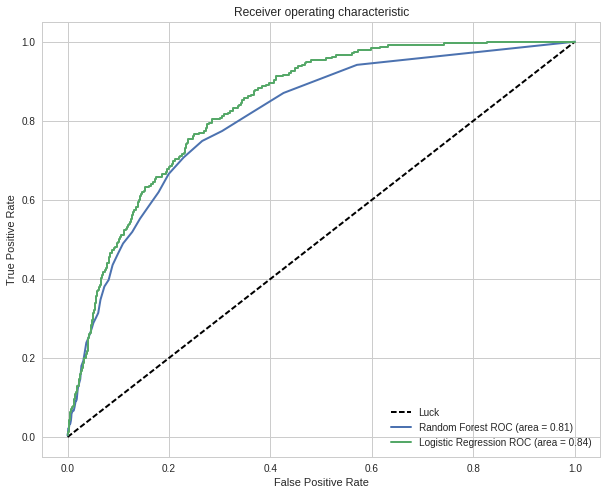

In [24]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Luck')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest ROC (area = %0.2f)' % auc_rfc, lw=2)
plt.plot(fpr_lrc, tpr_lrc, label='Logistic Regression ROC (area = %0.2f)' % auc_lrc, lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ROC curves and ROC AUC are almost the same for two models.

We can print feature importance values for Random Forest classifier and feature coefficients for Logistic Regression classifier.

In [25]:
pd.concat([pd.DataFrame(rfc.feature_importances_, index=features.columns, columns=['rfc importance']), 
           pd.DataFrame(lrc.coef_.transpose(), index=features.columns, columns=['lrc coefficients'])], axis=1)

,rfc importance,lrc coefficients
time,0.158792,0.000126
distance,0.260756,-0.088028
angle,0.176519,0.010433
is_rebound,0.015417,0.513243
is_pass_before,0.011861,-0.086336
is_cross_line,0.018136,0.274598
is_one_touch,0.029022,0.653822
is_fast_attack,0.013739,-0.275086
event_Shot Attempt - Blocked,0.090815,-2.164877
event_Shot Attempt - Bottom middle,0.013114,1.341702


According to the Random Forest classifier the most important features are distance and angle. Seems reasonably. However, Logistic Regression coefficients are more usefull because we can use them later for reconstructing the formula. Besides, they show positive and negative dependencies. For example, distance has negative impact on the expected goal score, while the angle has a positive impact. Also, all the missed the net shots has negative coefficients and, for example, blocked shots have a very high negative impact.

Let's make a little experiment for calculating xG score using our trained classifiers. There is a special function below for setting different shots parameters.

In [26]:
def make_shot(time, distance, angle, is_rebound, is_pass_before, is_cross_line, is_one_touch, 
              is_fast_attack, blocked, bottom_middle, deflected, lower_left, lower_right, 
              over_the_net, top_middle, upper_left, upper_right, wide_left, wide_right, 
              period_1, period_2, period_3, period_4):
    return [[time, distance, angle, is_rebound, is_pass_before, is_cross_line, is_one_touch, 
             is_fast_attack, blocked, bottom_middle, deflected, lower_left, lower_right, 
             over_the_net, top_middle, upper_left, upper_right, wide_left, wide_right, 
             period_1, period_2, period_3, period_4]]

Firstly, use the Random Forest classifier. Try to evaluate distance and angle dependencies for four differen shots. The shots are: upper left shot, lower right shot, upper left one timer after pass and bottom middle shot with rebound. Time is set to 1000 and period is to 3. The angle value is fixed to 90 while testing distance dependency and the distance value is set to 7 while testing angle dependency.

In [27]:
distance_range = range(51)
distance_scores_1 = []
distance_scores_2 = []
distance_scores_3 = []
distance_scores_4 = []
for distance in distance_range:
    shot = make_shot(time=1000, distance=distance, angle=90, is_rebound=False, is_pass_before=False,
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=1, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    distance_scores_1.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=distance, angle=90, is_rebound=False, is_pass_before=False, 
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0,
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=1, over_the_net=0, 
                     top_middle=0, upper_left=0, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    distance_scores_2.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=distance, angle=90, is_rebound=False, is_pass_before=True, 
                     is_cross_line=False, is_one_touch=True, is_fast_attack=False, blocked=0, 
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=1, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    distance_scores_3.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=distance, angle=90, is_rebound=True, is_pass_before=False,
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=1, deflected=0, lower_left=0, lower_right=0, over_the_net=0,
                     top_middle=0, upper_left=0, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    distance_scores_4.append(rfc.predict_proba(shot)[0][1])
    
angle_range = range(0, 81)
angle_scores_1 = []
angle_scores_2 = []
angle_scores_3 = []
angle_scores_4 = []
for angle in angle_range:
    shot = make_shot(time=1000, distance=7, angle=angle, is_rebound=False, is_pass_before=False,
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=1, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    angle_scores_1.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=7, angle=angle, is_rebound=False, is_pass_before=False, 
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=1, over_the_net=0, 
                     top_middle=0, upper_left=0, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    angle_scores_2.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=7, angle=angle, is_rebound=False, is_pass_before=True, 
                     is_cross_line=False, is_one_touch=True, is_fast_attack=False, blocked=0,
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=1, upper_right=0, wide_left=0, wide_right=0,
                     period_1=0, period_2=0, period_3=1, period_4=0)
    angle_scores_3.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=7, angle=angle, is_rebound=False, is_pass_before=False, 
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=1, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=0, upper_right=0, wide_left=0, wide_right=0,
                     period_1=0, period_2=0, period_3=1, period_4=0)
    angle_scores_4.append(rfc.predict_proba(shot)[0][1])

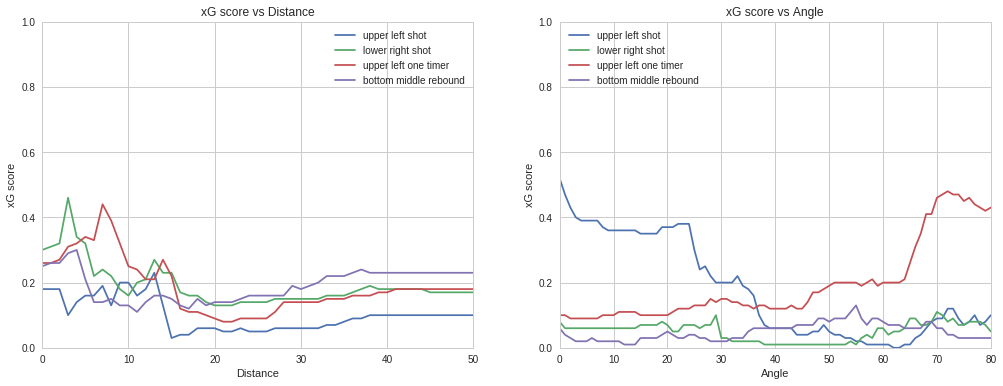

In [28]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.plot(distance_range, distance_scores_1, label='upper left shot')
plt.plot(distance_range, distance_scores_2, label='lower right shot')
plt.plot(distance_range, distance_scores_3, label='upper left one timer')
plt.plot(distance_range, distance_scores_4, label='bottom middle rebound')
plt.xlim([0, 50])
plt.ylim([0, 1])
plt.xlabel('Distance')
plt.ylabel('xG score')
plt.title('xG score vs Distance')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.plot(angle_range, angle_scores_1, label='upper left shot')
plt.plot(angle_range, angle_scores_2, label='lower right shot')
plt.plot(angle_range, angle_scores_3, label='upper left one timer')
plt.plot(angle_range, angle_scores_4, label='bottom middle rebound')
plt.xlim([0, 80])
plt.ylim([0, 1])
plt.xlabel('Angle')
plt.ylabel('xG score')
plt.title('xG score vs Angle')
plt.legend(loc='upper left')
plt.show()

We see that the Random Forest was overfitted to the noise presented in the data and was not generalized at all. Let's repeat the same experiment for the Logistic Regression classifier. It should be better according the F-score.

In [29]:
distance_range = range(51)
distance_scores_1 = []
distance_scores_2 = []
distance_scores_3 = []
distance_scores_4 = []
for distance in distance_range:
    shot = make_shot(time=1000, distance=distance, angle=90, is_rebound=False, is_pass_before=False,
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=1, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    distance_scores_1.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=distance, angle=90, is_rebound=False, is_pass_before=False, 
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0,
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=1, over_the_net=0, 
                     top_middle=0, upper_left=0, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    distance_scores_2.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=distance, angle=90, is_rebound=False, is_pass_before=True, 
                     is_cross_line=False, is_one_touch=True, is_fast_attack=False, blocked=0, 
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=1, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    distance_scores_3.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=distance, angle=90, is_rebound=True, is_pass_before=False,
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=1, deflected=0, lower_left=0, lower_right=0, over_the_net=0,
                     top_middle=0, upper_left=0, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    distance_scores_4.append(rfc.predict_proba(shot)[0][1])
    
angle_range = range(0, 81)
angle_scores_1 = []
angle_scores_2 = []
angle_scores_3 = []
angle_scores_4 = []
for angle in angle_range:
    shot = make_shot(time=1000, distance=7, angle=angle, is_rebound=False, is_pass_before=False,
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=1, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    angle_scores_1.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=7, angle=angle, is_rebound=False, is_pass_before=False, 
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=1, over_the_net=0, 
                     top_middle=0, upper_left=0, upper_right=0, wide_left=0, wide_right=0, 
                     period_1=0, period_2=0, period_3=1, period_4=0)
    angle_scores_2.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=7, angle=angle, is_rebound=False, is_pass_before=True, 
                     is_cross_line=False, is_one_touch=True, is_fast_attack=False, blocked=0,
                     bottom_middle=0, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=1, upper_right=0, wide_left=0, wide_right=0,
                     period_1=0, period_2=0, period_3=1, period_4=0)
    angle_scores_3.append(rfc.predict_proba(shot)[0][1])
    shot = make_shot(time=1000, distance=7, angle=angle, is_rebound=False, is_pass_before=False, 
                     is_cross_line=False, is_one_touch=False, is_fast_attack=False, blocked=0, 
                     bottom_middle=1, deflected=0, lower_left=0, lower_right=0, over_the_net=0, 
                     top_middle=0, upper_left=0, upper_right=0, wide_left=0, wide_right=0,
                     period_1=0, period_2=0, period_3=1, period_4=0)
    angle_scores_4.append(rfc.predict_proba(shot)[0][1])

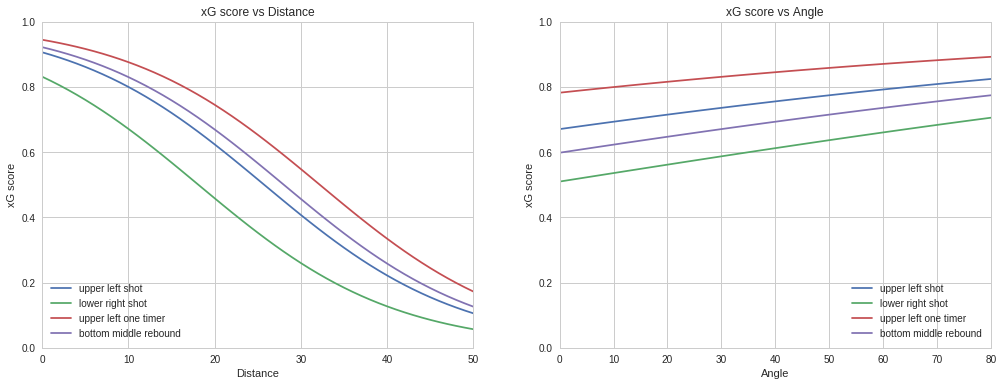

In [30]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.plot(distance_range, distance_scores_1, label='upper left shot')
plt.plot(distance_range, distance_scores_2, label='lower right shot')
plt.plot(distance_range, distance_scores_3, label='upper left one timer')
plt.plot(distance_range, distance_scores_4, label='bottom middle rebound')
plt.xlim([0, 50])
plt.ylim([0, 1])
plt.xlabel('Distance')
plt.ylabel('xG score')
plt.title('xG score vs Distance')
plt.legend(loc='lower left')
plt.subplot(1, 2, 2)
plt.plot(angle_range, angle_scores_1, label='upper left shot')
plt.plot(angle_range, angle_scores_2, label='lower right shot')
plt.plot(angle_range, angle_scores_3, label='upper left one timer')
plt.plot(angle_range, angle_scores_4, label='bottom middle rebound')
plt.xlim([0, 80])
plt.ylim([0, 1])
plt.xlabel('Angle')
plt.ylabel('xG score')
plt.title('xG score vs Angle')
plt.legend(loc='lower right')
plt.show()

Here we got the reasonable result. xG score is decreased while distance is increased and xG score is slightly increased while angle is getting closer to the 90 degree. Also, we see that the upper left shots have higher xG score than lower right shots. One timers after pass have the highest xG score. 

In the end, let's just check that our classifiers have the same perfomance on cross validation with 5 splits.

In [31]:
cv = StratifiedKFold(n_splits=5)

tpr_all, fpr_all, auc_all = [], [], []

classifiers = [RandomForestClassifier(100, class_weight='balanced'), LogisticRegression(class_weight='balanced')] 

for clf in classifiers:
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    for (train, test) in cv.split(features, targets):
        clf.fit(nfeatures[train], ntargets[train])
        probas = clf.predict_proba(nfeatures[test])
        fpr, tpr, thresholds = roc_curve(ntargets[test], probas[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0

    mean_tpr /= cv.get_n_splits(features, targets)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    tpr_all.append(mean_tpr)
    fpr_all.append(mean_fpr)
    auc_all.append(mean_auc)

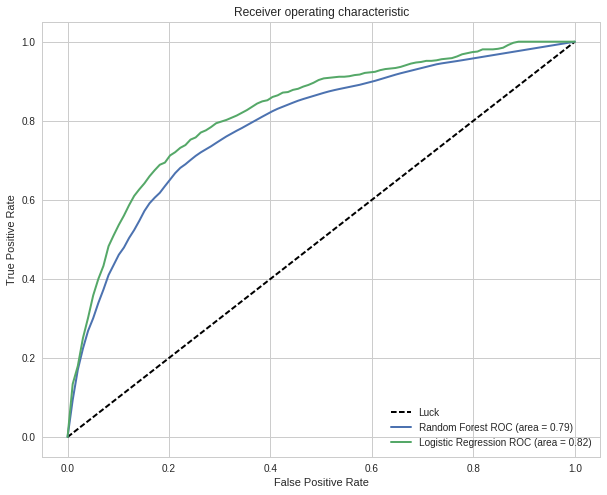

In [32]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Luck')
plt.plot(fpr_all[0], tpr_all[0], label='Random Forest ROC (area = %0.2f)' % auc_all[0], lw=2)
plt.plot(fpr_all[1], tpr_all[1], label='Logistic Regression ROC (area = %0.2f)' % auc_all[1], lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curves are pretty the same as without CV.

# Conclusion

We got two classifiers. One of them has good enough results. We also made a little experiment with classifiers predicting xG scores for different shots. The experiment can be easily extended using built template and function in this notebook.

Of course we can get more accurate xG scores training our classifiers using more data. In this notebook it was shown the proposed approach is suitable for this task.